In [1]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/Users/Adam/muzea.xlsx")
print(data.head())

                Nazwa  Liczba_zwiedzajacych  ile_mieszkancow  rozwody  \
0        DOLNOŚLĄSKIE               1978088          2904207     5797   
1  KUJAWSKO-POMORSKIE               1189942          2086210     4000   
2           LUBELSKIE               1371707          2139726     2483   
3            LUBUSKIE                253151          1018075     1937   
4             ŁÓDZKIE                988873          2493603     4267   

   separacje  uklad_krazenia  nowotwory  uklad_oddech  samoboj_na_10tys  \
0        175            47.7       25.2           3.7               1.8   
1        163            44.9       28.6           6.3               1.5   
2        150            51.5       21.2           4.7               2.2   
3         56            45.2       25.9           4.4               2.2   
4        263            45.5       23.0           5.0               1.9   

                Region  
0  południowo-zachodni  
1             północny  
2             wschodni  
3    półno

In [3]:
# SZEREG ROZDZIELCZY

type = data["Region"]

freq = type.value_counts()
print(freq)

wschodni               4
północny               3
północno-zachodni      3
południowy             2
centralny              2
południowo-zachodni    2
Name: Region, dtype: int64


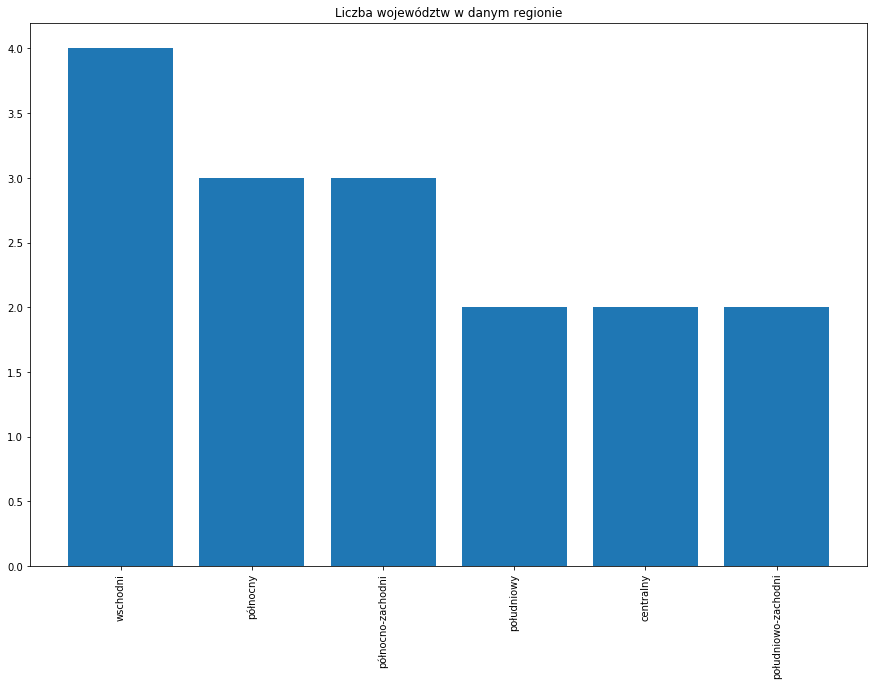

In [4]:
# Wykres słupkowy

x=np.arange(0,len(freq))
plt.figure(figsize=(15,10))
plt.bar(x,freq)
plt.xticks(x,freq.index, rotation=90)
plt.title("Liczba województw w danym regionie")
plt.show()

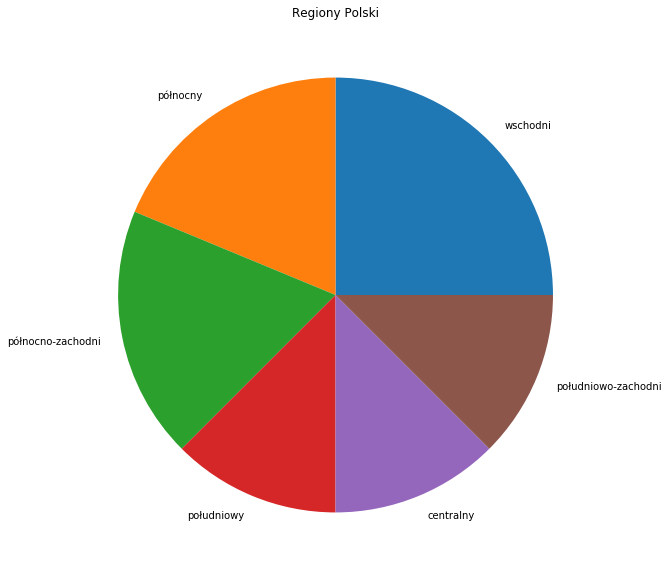

In [5]:
# Wykres kołowy

plt.figure(figsize=(15,10))
plt.pie(freq, labels=freq.index)
plt.title("Regiony Polski")
plt.show()

In [6]:
# Przygotowanie danych do analizy ststystycznej

lzm = data["Liczba_zwiedzajacych"]
rzw = data["rozwody"]
sep = data["separacje"]
ukr = data["uklad_krazenia"]
ntw = data["nowotwory"]
uod = data["uklad_oddech"]
sbj = data["samoboj_na_10tys"]
lm = data["ile_mieszkancow"]

In [7]:
# Średnia i odch. standrdowe 2 zmiennych:

print('Liczba ludności w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(lm), np.std(lm)))
print('Liczba zwiedzających muzea w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(lzm), np.std(lzm)))

Liczba ludności w poszcz. wojewodztwach: średnia = 2402327.44, odch. standardowe = 1226671.43
Liczba zwiedzających muzea w poszcz. wojewodztwach: średnia = 2343943.00, odch. standardowe = 3276708.70


In [8]:
# KORELACJA (r-Pearsona)

# Czy liczba zwiedzających muzea w poszczególnych województwach jest skorelowana z liczbą mieszkańców?

from scipy.stats import pearsonr
corr, _ = pearsonr(lzm, lm)
print(corr)

0.6820735005588521


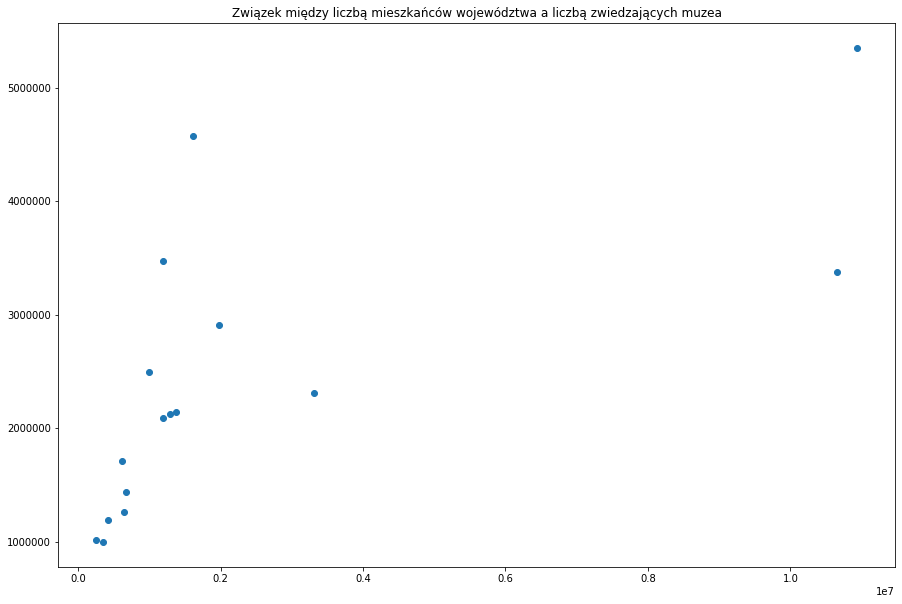

In [9]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(lzm, lm)
plt.title("Związek między liczbą mieszkańców województwa a liczbą zwiedzających muzea")
plt.show()

In [10]:
# Czy liczba samobójstw w poszczególnych województwach
# jest skorelowana z liczbą rozwodów?

print('Liczba samobójstw na 10000 mieszkańców'
      ' w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(sbj), np.std(sbj)))

print('Liczba rozwodów w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(rzw), np.std(rzw)))

Liczba samobójstw na 10000 mieszkańców w poszcz. wojewodztwach: średnia = 1.74, odch. standardowe = 0.27
Liczba rozwodów w poszcz. wojewodztwach: średnia = 3801.06, odch. standardowe = 2110.09


In [11]:
corr, _ = pearsonr(sbj, rzw)
print(corr)

-0.5193122415497085


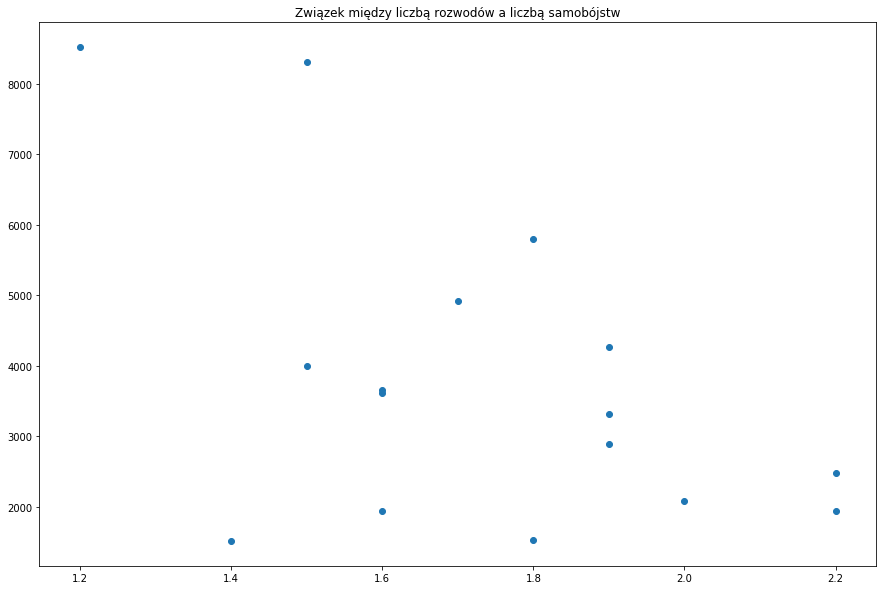

In [12]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(sbj, rzw)
plt.title("Związek między liczbą rozwodów"
          " a liczbą samobójstw")
plt.show()

In [13]:
# Czy liczba rozwodów w poszczególnych województwach
# jest skorelowana z liczbą separacji?

print('Liczba separacji w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(sep), np.std(sep)))
print('Liczba rozwodów w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(rzw), np.std(rzw)))

Liczba separacji w poszcz. wojewodztwach: średnia = 173.38, odch. standardowe = 112.80
Liczba rozwodów w poszcz. wojewodztwach: średnia = 3801.06, odch. standardowe = 2110.09


In [14]:
corr, _ = pearsonr(sep, rzw)
print(corr)

0.8701540026702343


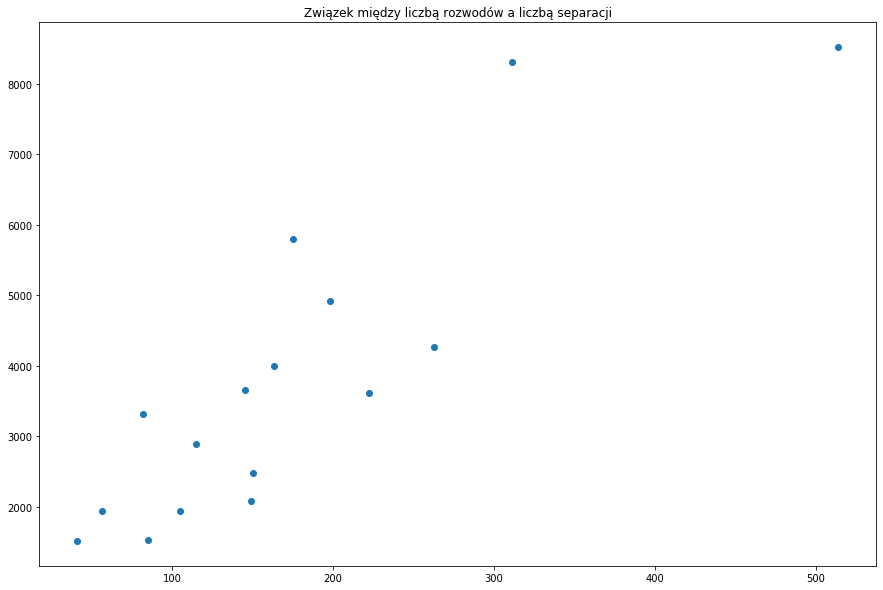

In [15]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(sep, rzw)
plt.title("Związek między liczbą rozwodów"
          " a liczbą separacji")
plt.show()

In [16]:
# REGRESJA LINIOWA

# W jakim stopniu takie czynniki, jak liczba zgonów
# (z powodu róznych rodzajów chorób oraz na skutek
# samobójstwa) oraz separacje i rozwody wpływają
# na liczbę mieszkańców.

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

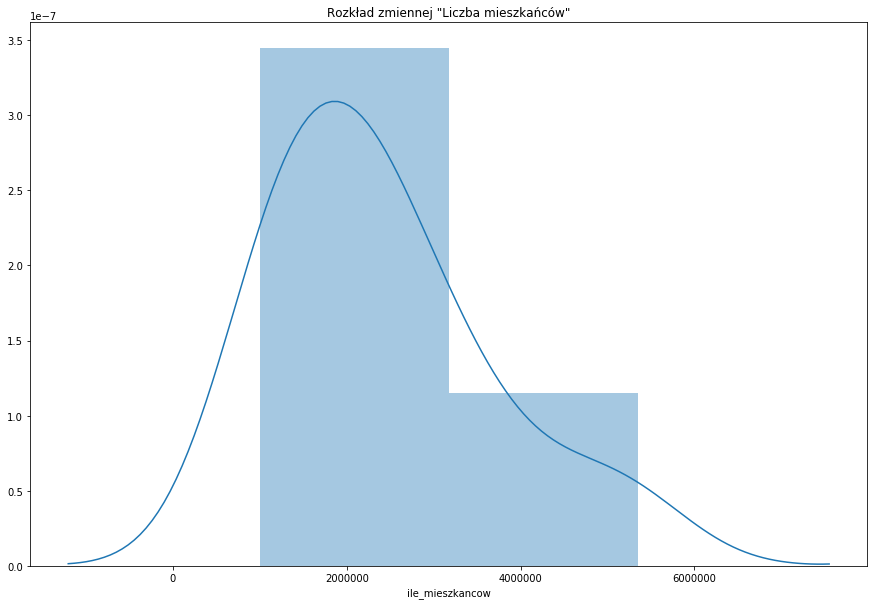

In [17]:
# Podział danych na (potencjalne) wyznaczniki (X) oraz zmienną przewidywaną (y)

X = data[['uklad_krazenia', 'nowotwory', 'uklad_oddech',
          'samoboj_na_10tys', 'rozwody', 'separacje']]
y = data['ile_mieszkancow']


# Jaki rozkład ma zmienna y:

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Rozkład zmiennej "Liczba mieszkańców"')
seabornInstance.distplot(lm)

In [18]:
# Dane rozdzielamy na zestaw treningowy (80%) i testowy (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Model poddajemy treningowi:

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Współczynniki regresji ustalone przez model:

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
uklad_krazenia,22296.091871
nowotwory,103742.528970
uklad_oddech,-88249.996032
samoboj_na_10tys,332264.072582
rozwody,184.274804
separacje,5482.348817


In [21]:
# Model dokonuje predykcji:

y_pred = regressor.predict(X_test)

In [22]:
# Porównujemy wartości faktyczne i przewidywane przez model

df = pd.DataFrame({'Faktyczna': y_test, 'Przewidywana': y_pred})
df

,Faktyczna,Przewidywana
1,2086210,2.415274e+06
6,5349114,3.630591e+06
8,2127657,1.809867e+06
9,1188800,1.352479e+06


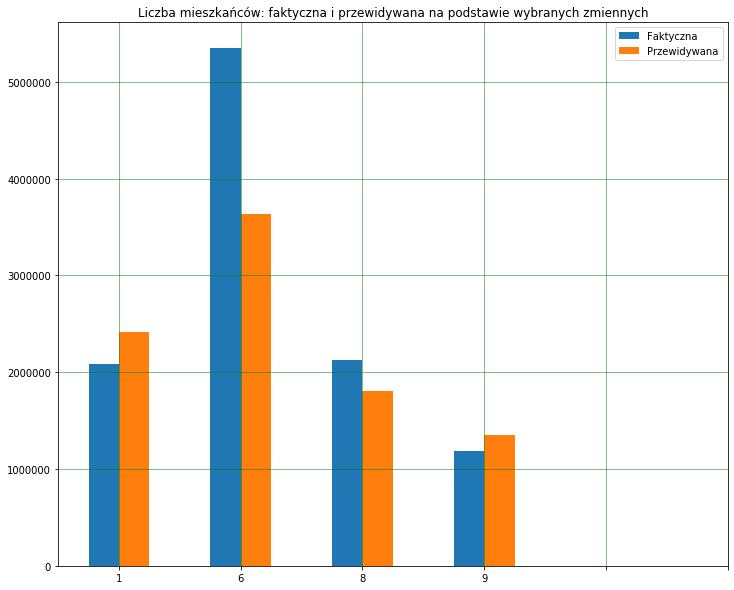

In [23]:
df.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(x,rotation=0)
plt.title("Liczba mieszkańców: faktyczna i przewidywana na podstawie wybranych zmiennych")
plt.show()